In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.drop(["deck","embark_town"], axis = 1 , inplace = True)

In [4]:
titanic["age"].fillna(titanic["age"].median(), inplace = True)

C:\Users\Smita\AppData\Local\Temp\ipykernel_8808\2649837275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace = True)


In [5]:
titanic.dropna(inplace = True)

In [6]:
le = LabelEncoder()
titanic["sex"] = le.fit_transform(titanic["sex"])

In [7]:
titanic["embarked"] = le.fit_transform(titanic["embarked"])

In [8]:
X = titanic[["pclass", "sex", "age", "fare", "embarked"]]
y = titanic["survived"]

In [9]:
scaler = StandardScaler()

In [10]:
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42 )

In [12]:
model = Sequential()
model.add(Dense(10, activation = "tanh", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "tanh"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

C:\Users\Smita\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 16, validation_split = 0.2 )

Epoch 1/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6610 - loss: 0.6532 - val_accuracy: 0.7063 - val_loss: 0.5993
Epoch 2/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7313 - loss: 0.5882 - val_accuracy: 0.7552 - val_loss: 0.5497
Epoch 3/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7484 - loss: 0.5428 - val_accuracy: 0.7552 - val_loss: 0.5215
Epoch 4/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7637 - loss: 0.4940 - val_accuracy: 0.7622 - val_loss: 0.5050
Epoch 5/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7854 - loss: 0.4717 - val_accuracy: 0.7622 - val_loss: 0.4974
Epoch 6/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7919 - loss: 0.4601 - val_accuracy: 0.7622 - val_loss: 0.4941
Epoch 7/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7779 - loss: 0.4538 - val_accuracy: 0.7762 - val_loss: 0.4907
Epoch 8/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7688 - loss: 0.4711 - val_accurac

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n test accuracy : {accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8195 - loss: 0.4097

 test accuracy : 0.80


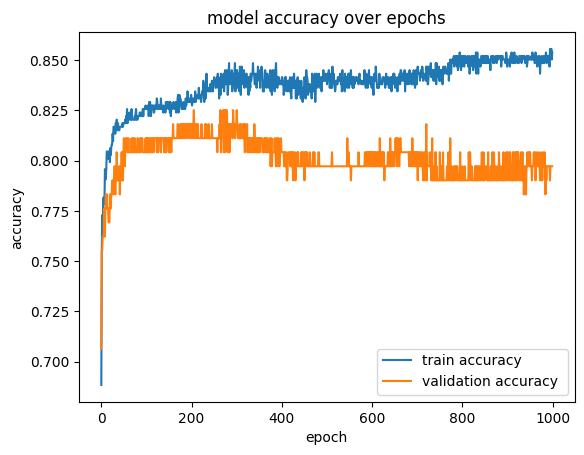

In [15]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy ")
plt.title("model accuracy over epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()